<a href="https://colab.research.google.com/github/abdullah-Khan-prog/Face-Mask-Detection-Using-Open-CV/blob/main/Face_Mask_Detection_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle --quiet
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d abdullahharoon102/face-mask-detection-dataset
!unzip -q face-mask-detection-dataset.zip -d Dataset


Dataset URL: https://www.kaggle.com/datasets/abdullahharoon102/face-mask-detection-dataset
License(s): CC0-1.0
 99% 1.51G/1.53G [00:08<00:00, 98.2MB/s]
100% 1.53G/1.53G [00:08<00:00, 185MB/s] 


In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [23]:
img_array = cv2.imread("Dataset/Dataset/Face_Mask/00000_Mask.jpg")

In [24]:
img_array.shape

(1024, 1024, 3)

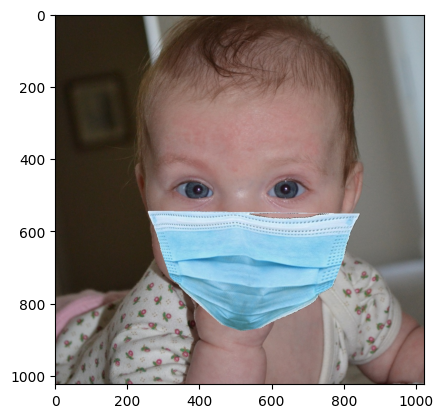

In [27]:
Datadirectory = "Dataset/Dataset/"
Classes =  ["Face_Mask","No_Mask"]
for category in Classes:
  path = os.path.join(Datadirectory,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break


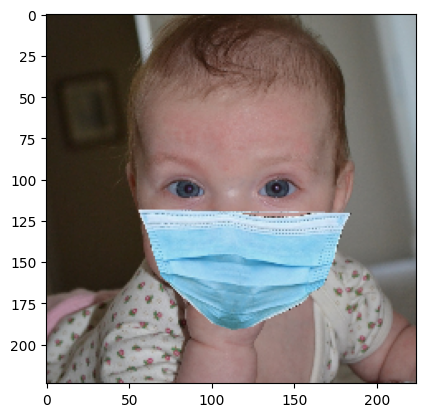

In [29]:
img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
training_data = []

def create_training_Data():
  for category in Classes:
    path = os.path.join(Datadirectory,category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
       try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
       except Exception as e:
        pass

create_training_Data()


In [37]:
print(len(training_data))

1950


In [38]:
import random
random.shuffle(training_data)

In [39]:
X = []
Y = []

for features,labels in training_data:
  X.append(features)
  Y.append(labels)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [40]:
X.shape

(1950, 224, 224, 3)

In [41]:
X = X/255.0

In [42]:
Y = np.array(Y)

In [43]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [44]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [49]:
base_input = model.layers[0].input

In [50]:
base_output = model.layers[-4].output

In [51]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [53]:
new_model = keras.Model(inputs = model.input, outputs = final_output)

In [54]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,320,705 (8.85 MB)

 Trainable params: 2,286,593 (8.72 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [55]:
new_model.compile(loss="binary_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [57]:
new_model.fit(X,Y, epochs =1,validation_split = 0.1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.8799 - loss: 11.3516 - val_accuracy: 0.9436 - val_loss: 45.8249


In [58]:
new_model.save('my_model3.h5')

In [59]:
new_model = tf.keras.models.load_model('my_model3.h5')

In [63]:
frame = cv2.imread('Dataset/Dataset/Face_Mask/00002_Mask.jpg')

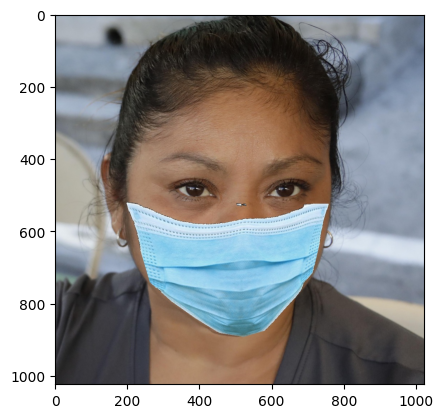

In [64]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [65]:
final_image = cv2.resize(frame,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [66]:
predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [67]:
predictions

array([[0.]], dtype=float32)

In [68]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [69]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [72]:
gray.shape

(1024, 1024)

In [73]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = frame[y:y+h,x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print("Face not detected")
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:ey+eh,ex:ex+ew]


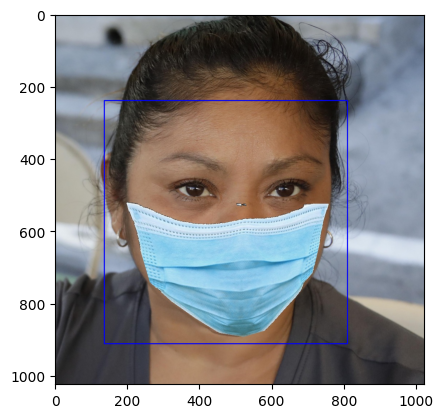

In [74]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

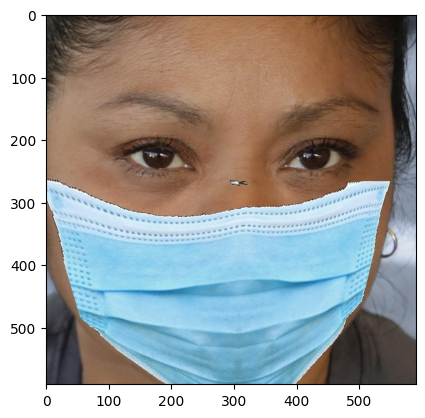

In [75]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [76]:
final_image =cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [77]:
predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [78]:
predictions

array([[0.]], dtype=float32)

In [79]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "Some text in the box"
(text_width,text_height) = cv2.getTextSize(text,font,fontScale = font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0]-25
box_coords = ((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)

In [83]:
while True:
  ret,frame = cap.read()
  if not ret:
      print("Cannot recieve frame")
      break
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade-frontalface_default.xml')
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray1,1,4)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if(len(facess)==0):
      print("Face not detected")
    else:
      for(ex,ey,ew,eh) in facess:
        face_roi = roi_color[ey:ey+eh,ex:ex+ew]

Cannot recieve frame


In [84]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0
font = cv2.FONT_HERSHEY_SIMPLEX
predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [85]:
font_sacle = 1.5
font = cv2.FONT_HERSHEY_PLAIN


In [87]:
if(predictions>0):
  status = "No Mask"

  x1,y1,w1,h1 = 0,0,175,75
  cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
  cv2.putText(frame,status,(x1+int(w1/10),y1+ int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
  cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
  cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
else:
  status = "Face Mask"
  x1,y1,w1,h1 = 0,0,175,75
  cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
  cv2.putText(frame,status,(x1+int(w1/10),y1+ int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
  cv2.putText(frame,status,(100,150),font,3,(0,255,0),2,cv2.LINE_4)
  cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0))



In [92]:
from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2_imshow(frame)

cap.release()
